# Gamma Correction



In [29]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

There goes the same old libraries

Gamma correction is also an non linear intensity transformation. what it simply does is taking the intensity of a pixel and raisng it to a given gamma power.

Y = A * (x**r)

But in our scope we are restrict this function. Main restriction is keeping the output value in the range of 0,255.

So what we do is

1. normalizing the pixel values
2. raising the normalized value to the power r.
3. Scaling the value back to range 0,255 by multiplying by 255.

You can see how it is done in the below code.



In [30]:
img_orig = cv.imread('./images/naruto.jpg', cv.IMREAD_COLOR) # creating an 3 dimentional array of the array.
print(img_orig.shape)

#cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

gamma = 2

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)

#cv.namedWindow("Gamma Corrected", cv.WINDOW_AUTOSIZE)
cv.imshow("Gamma Corrected", img_gamma)
cv.waitKey(0)
cv.destroyAllWindows()

(1290, 2053, 3)


In the code we first creates the trasform array(table) using the theory I explained above. You can take the indexs of the array as the x axis of the transformation function.

And we trasnform the image array using cv.LUT

## Let's plot some gamma correction functions

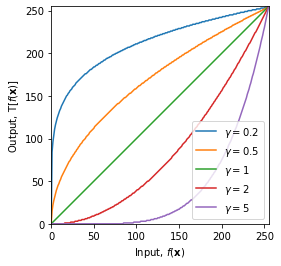

In [31]:
fig, ax = plt.subplots()
gamma = [0.2, 0.5, 1, 2, 5]
for g in gamma:
    table = np.array([(i/255.0)**(g)*255.0 for i in np.arange(0,256)]).astype('uint8')
    #print(table)
    ax.plot(table, label=r'$\gamma = {g}$'.format(g=g))
ax.legend(loc='best')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
plt.savefig('transform.png')
plt.show()

# Spatial filters



There are two main types of filtering applied to images:

    1.spatial domain filtering.
    2.frequency domain filtering.


Spatial domain filtering, we are performing filtering operations directly on the the pixels of an image.

Spatial filtering is a technique that uses a pixel and its neighbors to select a new value for the pixel. The simplest type of spatial filtering is called linear filtering. It attaches a weight to the pixels in the neighborhood of the pixel of interest, and these weights are used to blend those pixels together to provide a new value for the pixel of interest. Linear filtering can be uses to smooth, blur, sharpen, or find the edges of an image.

To apply the weights to the neighbourhood pixels we create a filter kernel window.

This window changes according to the kind of the filter we want to use.

## Average Filtering

In average filtering we take the average intensity of the neighbourhood pixels and apply it to the center pixel of the window.

Fisrt let's create the window for our filter

In [32]:
kernel = np.ones((3,3),np.float32)/9
print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


To apply the filter to the image there are two methods

        1. Using loops
        2. Using cv.Filter2D function

We won't be focusing on conplex loops for now.

Let's read an image an apply the filter to it using Filter2D function

In [33]:
img = cv.imread('./images/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

imgc = cv.filter2D(img,-1,kernel)

## Let's explore a little on Filter2D function

dst	=	cv.filter2D(	src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]	)

    src :	        input image.
    ddepth :        desired depth of the destination image
    kernel :        convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split and process them individually.
    anchor :        anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
    delta :         optional value added to the filtered pixels before storing them
    borderType :	pixel extrapolation method

## Note :
    when ddepth=-1, the output image will have the same depth as the source.

### In case you don't know about the depth of an image,

It is the number of bits used to represent a pixel. For a grayscale image it will be 8 bits.


### Another special parameter that is very important when using function is the bordertype.

If you pay attention to this kernel window movements, you will realize that when calculating the intensity values for the pixels at the edges of the image, some pixels will be missing above, left, right or below the anchor pixel.

So we need to apply some values to the mmissing pixels in order to get the output.

## There are few different mods to apply. Find them in [here](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)

## More possible combinations of ddepth transfotmations [here](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#filter_depths)

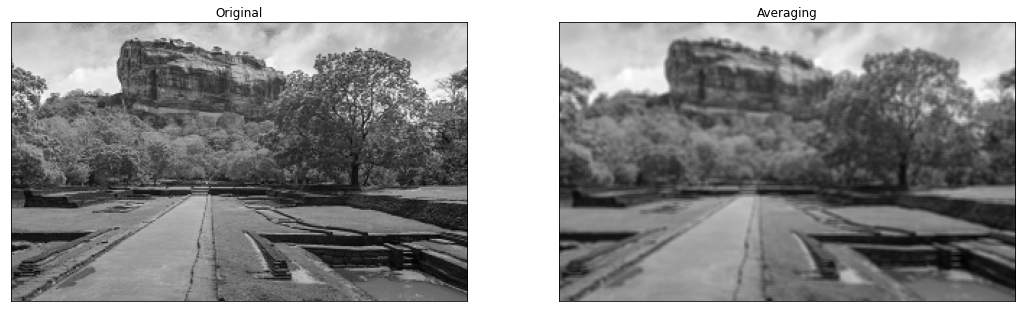

In [34]:
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

## Sobel Vertical filter

Let's take a look at the kernel window

In [35]:
kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
print(kernel)

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


As you can see this window apply the difference bertween the upper and lower pixels to the anchor pixels.

By looking at the kerenl we can say that this will increase the intensity of the pixels where we can detect a higher gradient along the y axis.

## So it will highlight the **horizontal** edges

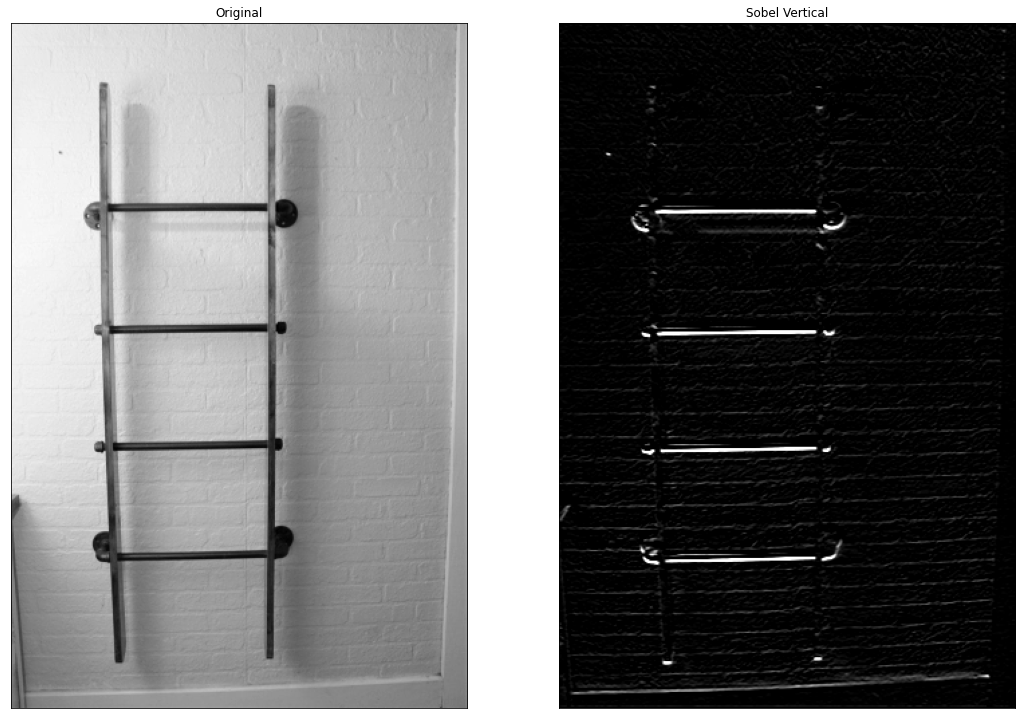

In [36]:
img = cv.imread('./images/ladder.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
imgc = cv.filter2D(img,-1,kernel)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

## Sobel Horiontal Filter

Let's first create the kernel window

In [37]:
kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
print(kernel)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


As you can see it's the opposite of the sobel horizontel filter.

## So we can expect it to highlight the verticle edges

uint8
251
1


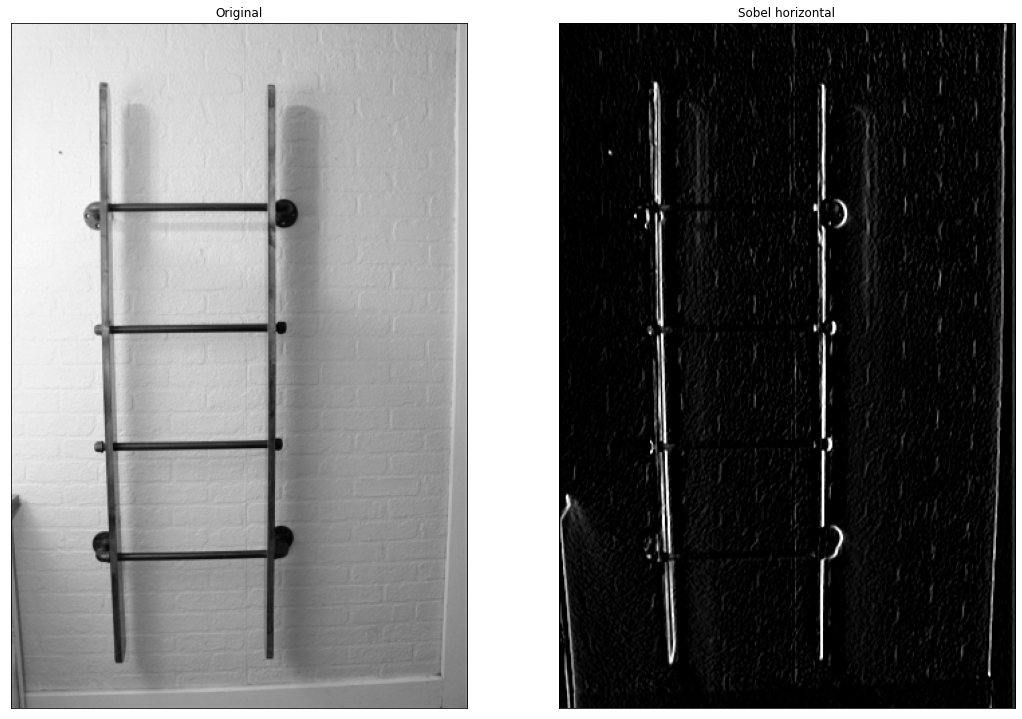

In [42]:
imgc = cv.filter2D(img,-1,kernel)

print(imgc.dtype)
print(max(img.ravel()))
print(min(img.ravel()))

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel horizontal')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

# A crucial point

While we are applying the filter we never considered about what kind of values will it produce. If they produce values greater than 255 we may not be getting the expected output.

Let's look at the maximum and minimum values the sobel filters can produce.

Maximum value occurs when all pixels of image which are interpolating with the negative values of the kernel window has intensity of 0. And at the same time pixels interpolating with positive values are 255.

    max = 255 x (1+2+1) = 1020
    min = -1020

In [43]:
print(imgc.dtype)
print(max(img.ravel()))
print(min(img.ravel()))

uint8
251
1


As you can see the filtered image only contains values from 0 to 255.

So we can conclude that Filter2D function scales 1200 to 255 and -1200 to 0 by it's own.

So there is no need in scaling the output array.